<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PRACTICA6/P6_Python_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr"></p>

<h1><b>Práctica 6: Diseño de filtros digitales</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

#<b>Procedimiento</b>

<b>4.1. Creación de la señal</b>

Proponga una secuencia sinusoidal $x_e(n)$, con $0 ≤ n ≤ 1000$, $F_0 = 0,01 \: Hz$ y $F_s = 25 \: Hz$. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética $x_e(n)$ a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:<br><br>

<center>$y_e(n) = αx_e(n-D) + w(n)$</center><br>

Donde $α$ representa la amplitud, $D$ es un retraso debido a la conducción a través de los diversos tejidos y $w(n)$ representa el ruido generado por la electrónica de los sistemas de adquisición.

<b>1)</b> Genere las secuencias ficticias $x_e(n)$ y $y_e(n)$, implemente $w(n)$ como una secuencia de ruido Gaussiano con media cero y varianza $σ^2 = 0,01$, establezca $α = 0,8$ y un retraso $D = 15$ muestras. Grafique ambas señales.

<b>Nota:</b> Para generar el ruido gaussiano use la función de ```numpy: np.random.normal```.

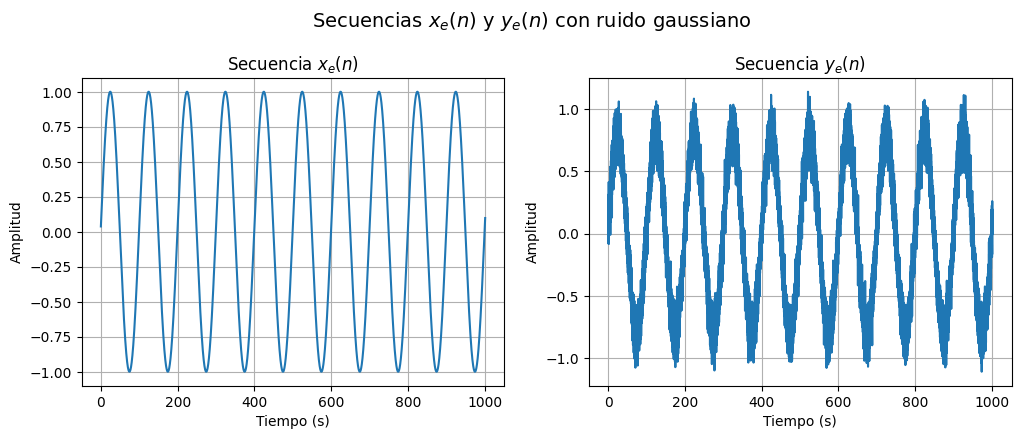

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

F0 = 0.01
Fs = 25
alfa = 0.8
D = 15
var = 0.01
media = 0

n = np.arange(0, 1001, 1/Fs)
x_e = np.sin(2*np.pi*F0*(n + D/Fs))
w_n = np.random.normal(media, np.sqrt(var), len(n))
y_e = alfa*x_e + w_n

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Secuencias $x_e(n)$ y $y_e(n)$ con ruido gaussiano', x=0.5, y=1.05, fontsize=14)
axs[0].plot(n, x_e)
axs[0].set(xlabel='Tiempo (s)', ylabel='Amplitud', title='Secuencia $x_e(n)$')
axs[0].grid()

axs[1].plot(n, y_e)
axs[1].set(xlabel='Tiempo (s)', ylabel='Amplitud', title='Secuencia $y_e(n)$')
axs[1].grid()
plt.show()

<b>4.2. Diseño de un filtro</b>

La función ```firwin``` permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son:

> $N$: Orden del filtro<br>
$W_n$: Frecuencia de corte

Para filtros digitales $W_n$ está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. $W_n$ es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.


<b>2)</b> Diseñe un filtro FIR pasa bajas para la señal $y_e(n)$, con una frecuencia de corte de 1.25 muestras/s y orden 30.

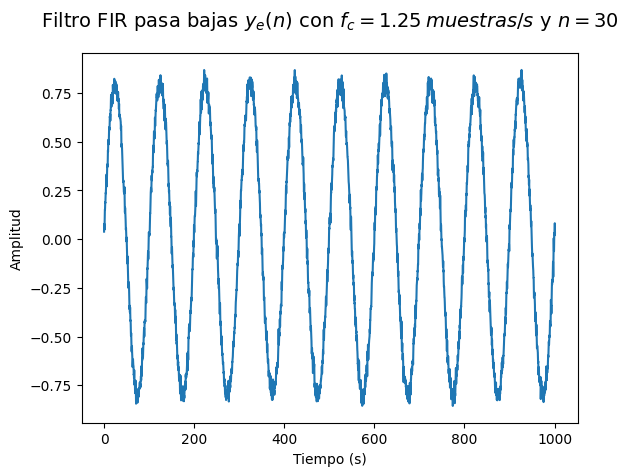

In [2]:
order = 30
nyquist = Fs/2
w_normalized = 1.25/nyquist
lowpass = signal.firwin(order+1, w_normalized, pass_zero='lowpass', window='hamming')
y_f_30 = signal.filtfilt(b=lowpass, a=1, x=y_e)

plt.plot(n, y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Filtro FIR pasa bajas $y_e(n)$ con $f_c=1.25 \: muestras/s$ y $n=30$', x=0.5, y=1.05, fontsize=14)
plt.show()

<b>3) </b> ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

<b>Nota:</b> Resultado esperado diseño de 3 filtros FIR (pasa bajas, pasa altas y pasa banda)

Para el filtro pasa altas se reemplaza el argumento ```pass_zero=False``` o ```pass_zero='highpass'```. Además, se utiliza la frecuencia de corte de 7.5 muestras/s para el cálculo de $w_n$ normalizada.

Como la señal $y_e(n)$ tiene principalmente componentes de frecuencia bajas (frecuencia fundamental de 0.01 Hz), este tipo de filtro atenúa la señal y deja pasar el ruido gaussiano introducido.

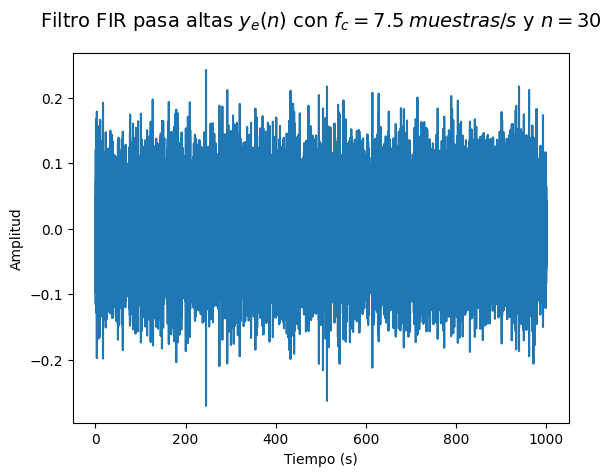

In [3]:
w_normalized = 7.5/nyquist
highpass = signal.firwin(order+1, w_normalized, pass_zero='highpass', window='hamming')
y_f_30 = signal.filtfilt(b=highpass, a=1, x=y_e)

plt.plot(n, y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Filtro FIR pasa altas $y_e(n)$ con $f_c=7.5 \: muestras/s$ y $n=30$', x=0.5, y=1.05, fontsize=14)
plt.show()

Para el filtro pasa bandas se consideran ambas frecuencias de corte que se trabajaron anteriormente. Se define el argumento ```pass_zero=False``` o ```pass_zero='bandpass'``` y las frecuencias normalizadas como una lista considerando la frecuencia de corte de 1.25 muestras/s y de 7.5 muestras/s.

Al igual que con el filtro pasa altas, se pasan atenuadas las frecuencias que componen la señal $y_e(n)$ por estar por debajo de la frecuencia límite de la banda definida, y solo se percibe el ruido.

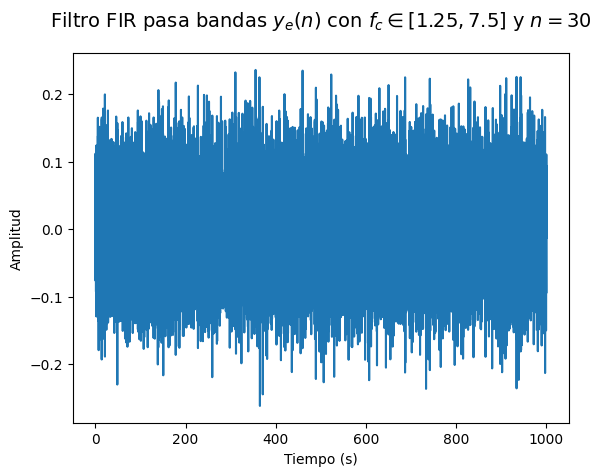

In [4]:
w_normalized = [1.25/nyquist, 7.5/nyquist]
bandpass = signal.firwin(order+1, w_normalized, pass_zero=False, window='hamming')
y_f_30 = signal.filtfilt(b=bandpass, a=1, x=y_e)

plt.plot(n, y_f_30)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Filtro FIR pasa bandas $y_e(n)$ con $f_c \in [1.25, 7.5]$ y $n=30$', x=0.5, y=1.05, fontsize=14)
plt.show()

La función ```iirfilter``` permite diseñar un filtro IIR.

<b>4)</b> Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.

<b>Nota:</b> Resultado esperado diseño de 3 filtros IIR (pasa bajas, pasa altas y pasa banda)

Para el filtro IIR se requirió un orden menor para obtener la señal filtrada; cuando se aplicó un orden de 30 aparecieron valores indeterminados, por lo que se optó por definir la mitad de ese valor como nuevo orden para el filtro. Se empleó la frecuencia de corte normalizada de 1.25 muestras/s para la configuración pasa bajas.

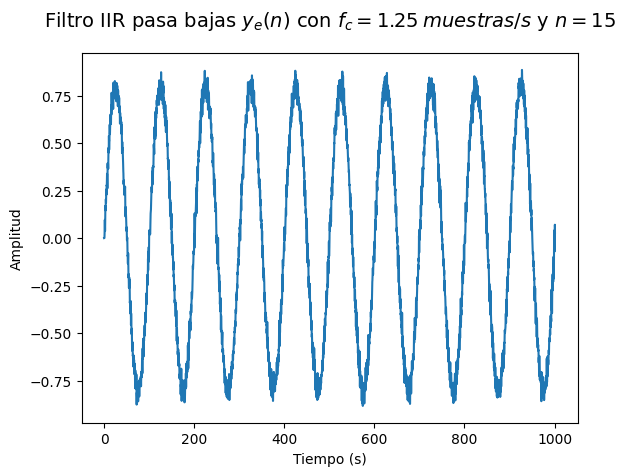

In [5]:
order = 15
w_normalized = 1.25/nyquist
b_low, a_low = signal.iirfilter(order, w_normalized, btype='lowpass')
y_f_15 = signal.lfilter(b_low, a_low, y_e)

plt.plot(n, y_f_15)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title(f'Filtro IIR pasa bajas $y_e(n)$ con $f_c=1.25 \: muestras/s$ y $n={order}$', x=0.5, y=1.05, fontsize=14)
plt.show()

Para el filtro pasa altas se reemplaza el argumento ```btype='highpass'```. Además, se utiliza la frecuencia de corte de 7.5 muestras/s para el cálculo de $w_n$ normalizada.

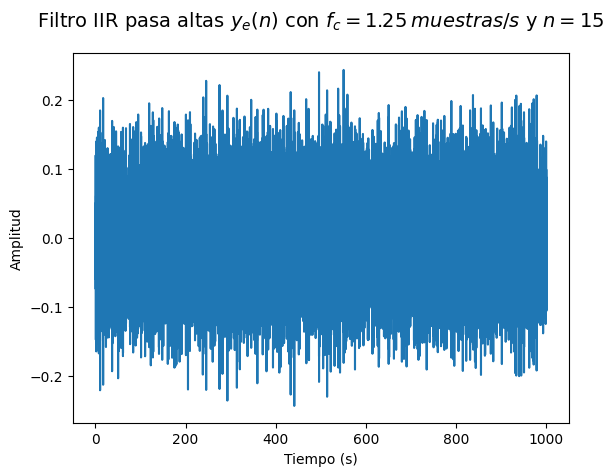

In [6]:
w_normalized = 7.5/nyquist
b_high, a_high = signal.iirfilter(order, w_normalized, btype='highpass')
y_f_15 = signal.lfilter(b_high, a_high, y_e)

plt.plot(n, y_f_15)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title(f'Filtro IIR pasa altas $y_e(n)$ con $f_c=1.25 \: muestras/s$ y $n={order}$', x=0.5, y=1.05, fontsize=14)
plt.show()

Para el filtro pasa bandas se consideran ambas frecuencias de corte que se trabajaron anteriormente. Se define el argumento ```ftype='bandpass'```.

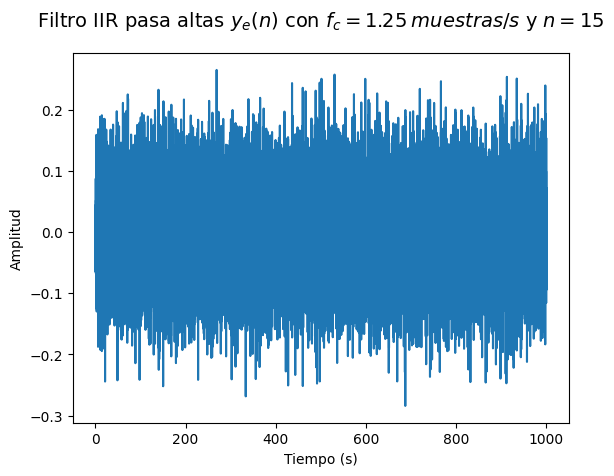

In [7]:
w_normalized = [1.25/nyquist, 7.5/nyquist]
b_pass, a_pass = signal.iirfilter(order, w_normalized, btype='bandpass')
y_f_15 = signal.lfilter(b_pass, a_pass, y_e)

plt.plot(n, y_f_15)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title(f'Filtro IIR pasa altas $y_e(n)$ con $f_c=1.25 \: muestras/s$ y $n={order}$', x=0.5, y=1.05, fontsize=14)
plt.show()

Para verificar la respuesta en fase y magnitud de los filtros, se implementa una función para graficar su respuesta al impulso en el dominio de la frecuencia, que recibe por argumentos el denominador y numerador de la función de transferencia del filtro, el orden y la frecuencia de Nyquist.

In [8]:
def mfreqz(b_fir, order_fir, b_iir, a_iir, order_iir, title, nyq_rate=1):
    w_fir, h_fir = signal.freqz(b_fir, 1)
    h_dB_fir = 20 * np.log10 (abs(h_fir))

    w_iir, h_iir = signal.freqz(b_iir, a_iir);
    h_dB_iir = 20 * np.log10 (abs(h_iir))

    w, h = [w_fir, w_iir], [h_fir, h_iir]
    h_db = [h_dB_fir, h_dB_iir]
    order = [order_fir, order_iir]
    filter_type = ['FIR', 'IIR']

    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle(f'Respuesta al impulso en frecuencia de filtros FIR y IIR {title}', x=0.5, y=0.95, fontsize=14, fontweight='bold')
    for row in range(2):
      axs[row, 0].plot((w[row]/max(w[row]))*nyq_rate, abs(h[row]))
      axs[row, 0].set(ylabel='Magnitud', title=r'Respuesta en frecuencia - Orden: ' + str(order[row]) + ' - Tipo: ' + str(filter_type[row]))
      axs[row, 0].grid()

      axs[row, 1].plot((w[row]/max(w[row]))*nyq_rate, h_db[row])
      if row == 1:
        axs[row, 1].set(xlabel=r'Frecuencia normalizada (x$\pi$rad/sample)')
      axs[row, 1].set(ylabel='Magnitud (dB)', title=r'Respuesta en frecuencia - Orden: ' + str(order[row]) + ' - Tipo: ' + str(filter_type[row]))
      axs[row, 1].grid()

      h_Phase = np.unwrap(np.arctan2(np.imag(h[row]),np.real(h[row])))
      axs[row, 2].plot((w[row]/max(w[row]))*nyq_rate, h_Phase)
      axs[row, 2].set(ylabel='Fase (rad)', title=r'Respuesta en fase - Orden: ' + str(order[row]) + ' - Tipo: ' + str(filter_type[row]))
      axs[row, 2].grid()

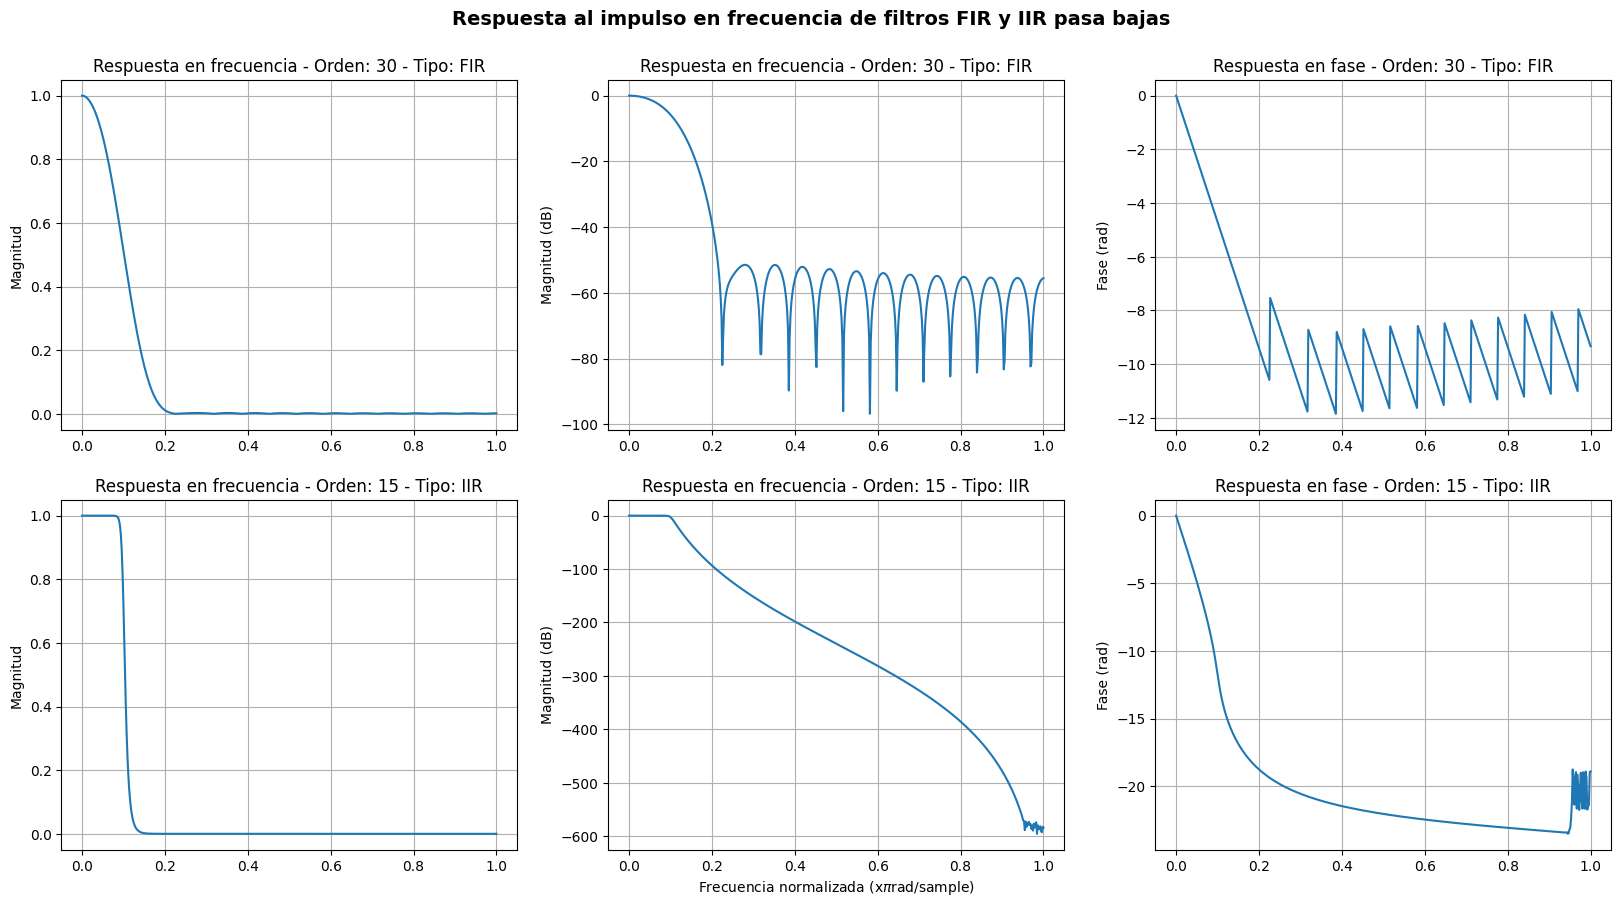

In [9]:
mfreqz(b_fir=lowpass, order_fir=30, b_iir=b_low, a_iir=a_low, order_iir=15, title='pasa bajas')

De los gráficos de la respuesta al impulso para el filtro FIR pasa bajas se evidencia un decrecimiento en la magnitud, tanto adimensional como en dB, para valores crecientes de frecuencia. Por otro lado, se presenta un desplazamiento de fase considerable para frecuencias normalizadas a partir de 0.2 Hz o en la banda de rechazo.

Para el filtro IIR se presenta una pendiente más pronunciada y parecida a la de los filtros ideales en el gráfico de magnitud adimensional; sin embargo, para la magnitud en decibelios se presenta una pendiente de atenuación más retardada y con mucho rizado en la banda de rechazo. Para la fase se presenta un desplazamiento considerable a partir de casi la misma frecuencia que el filtro FIR, pero a diferencia del anterior presenta un rizado muy pronunciado alrededor de las frecuencias cercanas a 1.

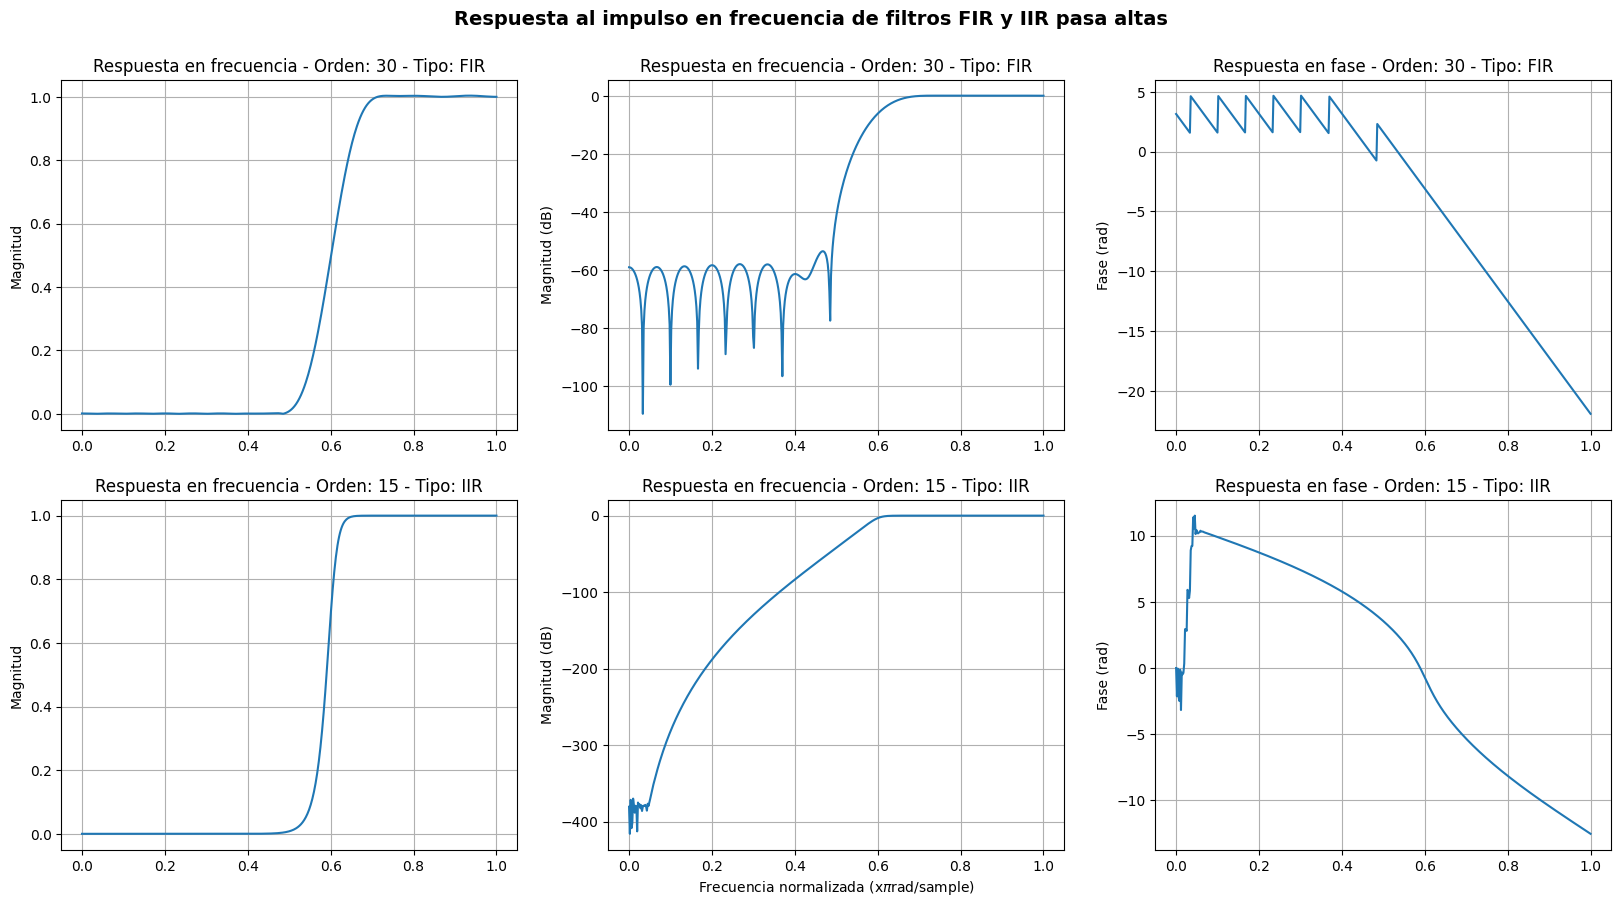

In [10]:
mfreqz(b_fir=highpass, order_fir=30, b_iir=b_high, a_iir=a_high, order_iir=15, title='pasa altas')

De los gráficos de la respuesta al impulso para el filtro FIR pasa altas se evidencia un comportamiento contrario al del filtro pasa bajas, donde las frecuencias bajas hasta casi la frecuencia de corte son atenuadas, mientras que las frecuencias normalizadas altas pasan con una magnitud alta. En cuanto a la fase se observa un leve desplazamiento positivo de la fase en las frecuencias bajas, y un desfase considerable para frecuencias altas.

En cuanto al filtro IIR, se presenta un comportamiento similar de atenuación por debajo de la frecuencia de corte para la magnitud adimensional, mientras que para la magnitud en dB se presenta una pendiente muy achatada que implica menor velocidad de atenuación, y una banda de rechazo con mucho rizado en frecuecias normalizadas bajas. Finalmente para la fase, se presenta un desfase positivo inicial para frecuencias por debajo de la frecuencia de corte, y a partir de ese mismo punto se producen desfases negativos para frecuencias mayores.

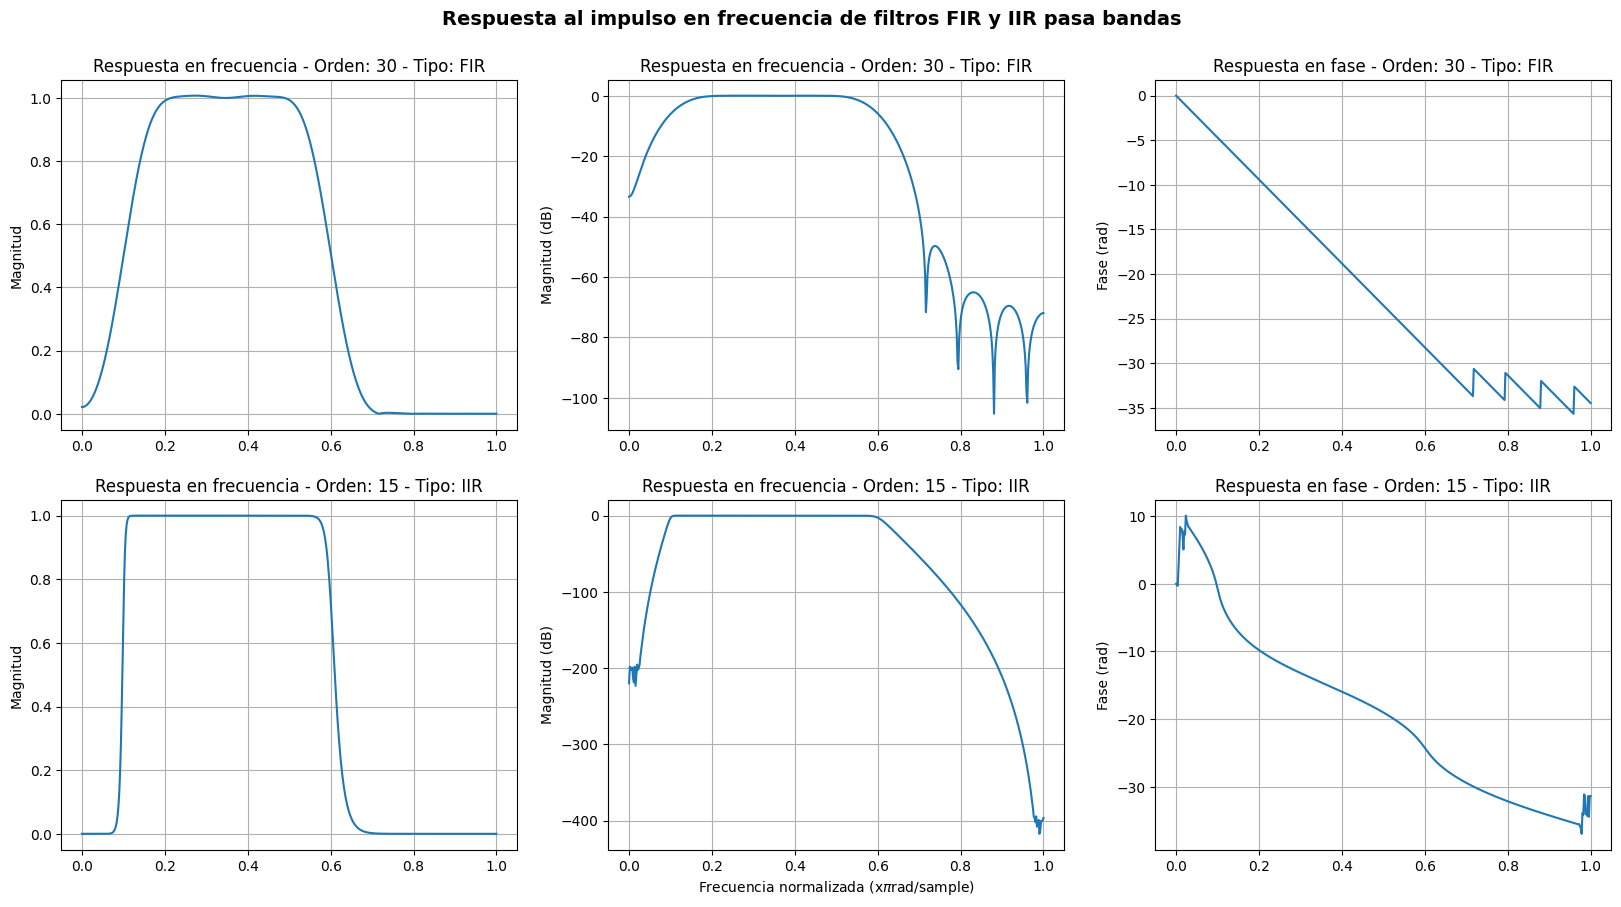

In [11]:
mfreqz(b_fir=bandpass, order_fir=30, b_iir=b_pass, a_iir=a_pass, order_iir=15, title='pasa bandas')

De los gráficos de la respuesta al impulso para el filtro FIR pasa bandas se observa una atenuación para las frecuencia a los lados de la banda principal entre las frecuencias normalizadas equivalentes a 1.25 y 7.5 muestras/s. En cuanto a la fase, se presenta un rango desplazado menor para las frecuencias normalizadas altas.

Sobre el filtro IIR se destaca un comportamiento muy cercano a lo ideal para la magnitud adimensional, donde las frecuencias por debajo y por encima de la banda de frecuencias definida tienen una atenuación completa. Por otro lado, la magnitud en dB presenta un rizado considerable en las bandas laterales de rechazo y una pendiente lenta entre las frecuencias amplificadas y la última banda de rechazo. En cuanto a la fase, se observa un desplazamiento positivo de la fase antes de la primera frecuencia de corte, y un desplazamiento negativo a partir de la misma frecuencia. Como en los filtros anteriores, se presenta un rizado considerable en las frecuencias más cercanas a 1, siendo 1 la frecuencia donde la frecuencia de Nyquist y la de corte son casi iguales.

<b>4.3. Filtrado</b>

Las funciones ```lfilter``` y ```filtfilt``` filtran una secuencia de información $x(n)$ usando un filtro IIR o FIR.


<b>5)</b> Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal $y_e(n)$ ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

<b>lfilter:</b> Esta función aplica un filtro FIR (Finite Impulse Response) a una señal en una dirección. Es útil para implementar filtros de forma causal. El resultado puede tener un retraso debido a la naturaleza del filtro.

<b>filtfilt:</b> Esta función aplica el mismo filtro en ambas direcciones (adelante y atrás), lo que elimina el retraso y proporciona una respuesta más precisa. Sin embargo, puede ser más susceptible a la inestabilidad si el filtro tiene un orden muy alto.

<b>¿Por qué se utiliza solo el numerador?</b>
El filtro FIR se define únicamente por sus coeficientes de numerador (los pesos) y, dado que no tiene componentes de retroalimentación (como en los filtros IIR), el denominador se considera como 1.

<b>Evidencia de cambios en el uso de funciones de filtrado</b>
Al usar lfilter, es posible observar un retraso en la señal resultante, lo que puede manifestarse como un desfase o cambio temporal en la forma de onda filtrada. En contraste, al aplicar filtfilt, la señal filtrada debería ser más limpia, sin este retraso, mostrando un alineamiento más preciso con la señal original. Aunque en el grafico este desfase es casi impercetible, si se puede observar que la señal verde, con lfilter, se encuentra un poco retrasada, pero no son cambios muy significativos para este caso.

<b>¿Cómo se puede explicar la falta de coincidencia?</b>
La falta de coincidencia entre las señales filtradas por lfilter y filtfilt se debe principalmente al retraso introducido por lfilter. Este comportamiento es característico de los filtros FIR, donde la salida en lfilter está desfasada debido a la acumulación de muestras.

<b>¿Es adecuado el orden del filtro usado?</b>
Si,  ya que la señal filtrada conserva su forma sinusoidal y no presenta distorsiones notables. Esto sugiere que el orden del filtro es adecuado para el tipo de señal que se está filtrando.

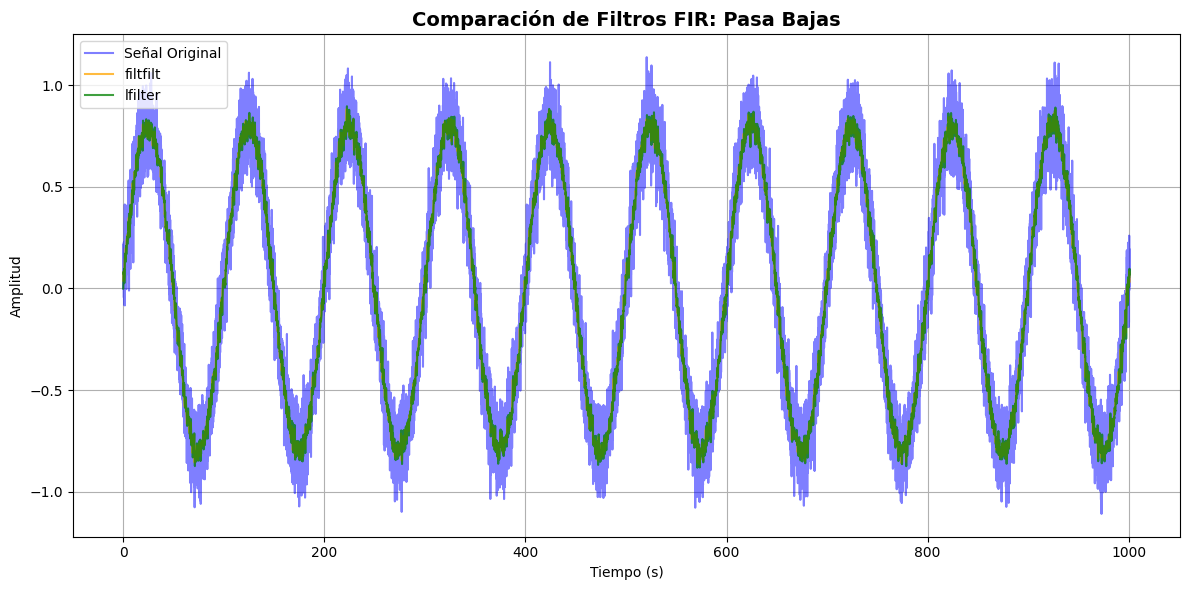

In [12]:
w_normlow=1.25/nyquist
lowpass = signal.firwin(order+1, w_normlow, window='hamming')
y_f_lfilter = signal.lfilter(b=lowpass, a=1, x=y_e)
y_f_filtfilt = signal.filtfilt(b=lowpass, a=1, x=y_e)


plt.figure(figsize=(12, 6))
plt.plot(n, y_e, label='Señal Original', color='blue', alpha=0.5)
plt.plot(n, y_f_filtfilt, label='filtfilt', color='orange', alpha=0.75)
plt.plot(n, y_f_lfilter, label='lfilter', color='green', alpha=0.75)

plt.title("Comparación de Filtros FIR: Pasa Bajas", fontsize=14, fontweight='bold')
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

<b>6)</b> Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal $y_e(n)$ ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.

El filtro IIR trabaja con órdenes menores a los filtros FIR, y posee además un denominador con coeficientes polinómicos significativos que permiten introducir una realimentación a la respuesta al impulso del filtro. Por esta misma razón es que los filtros IIR requieren un orden menor, debido a que trabajan con valores pasados de la salida y se pueden obtener respuestas en frecuencia adecuadas con menos coeficientes del numerador.

Para la implementación, se usó un orden menor de 20 para el filtro IIR.

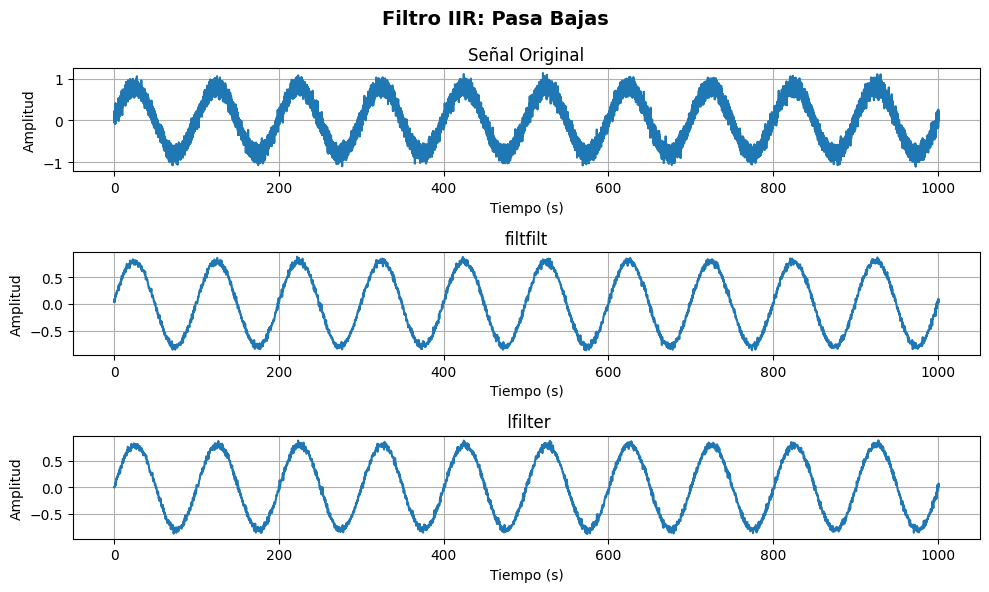

In [13]:
orden = 20
w_normlow = 1.25/nyquist
blow, alow = signal.iirfilter(order, w_normlow,btype='lowpass', ftype='butter')
y_f_lfilter = signal.lfilter(b=blow,a=alow,x=y_e)
y_f_filtfilt = signal.filtfilt(b=blow,a=alow,x=y_e)

plt.figure(figsize=(10, 6))
plt.suptitle("Filtro IIR: Pasa Bajas", fontsize=14,fontweight='bold')

plt.subplot(3, 1, 1)
plt.plot(n, y_e)
plt.title("Señal Original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(n, y_f_filtfilt)
plt.title("filtfilt")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(n, y_f_lfilter)
plt.title(" lfilter")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()
plt.tight_layout()
plt.show()

La diferencia más evidente entre los filtros IIR y FIR es que el primero no requiere de una paridad específica del orden, es decir que funciona ya sea con un orden impar o con un orden par de filtro.

<b>4.4. Aplicación</b>

Cargue la señal <i>señal_filtros.txt</i> adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
data = np.loadtxt('/content/drive/MyDrive/senal_filtros.txt')
canal1 = data[:, 0]

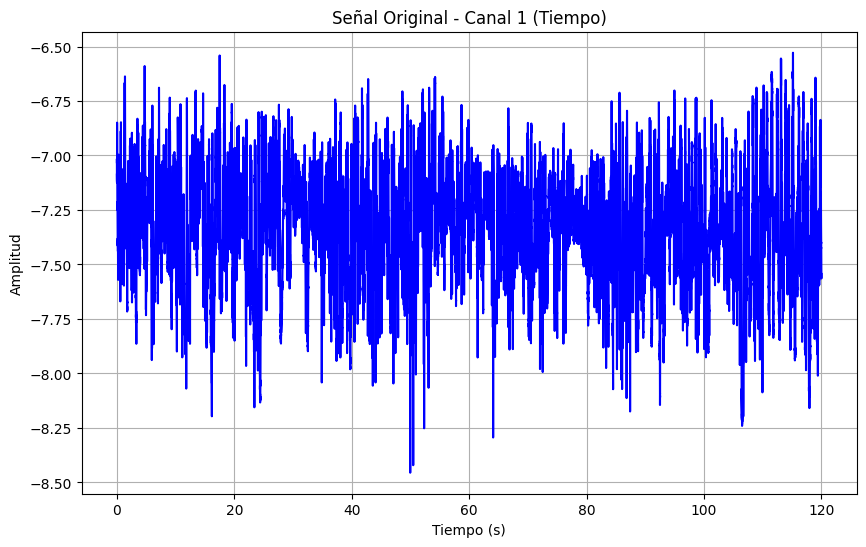

In [23]:
fs = 500
t = np.arange(len(canal1)) / fs

plt.figure(figsize=(10, 6))
plt.plot(t, canal1, color='blue')
plt.title("Señal Original - Canal 1 (Tiempo)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid(True)
plt.show()

<b>7)</b> Realice un análisis frecuencial con la función que permite calcular el
periodograma de Welch de una señal, ¿Hay presencia de ruido eléctrico? Analice.

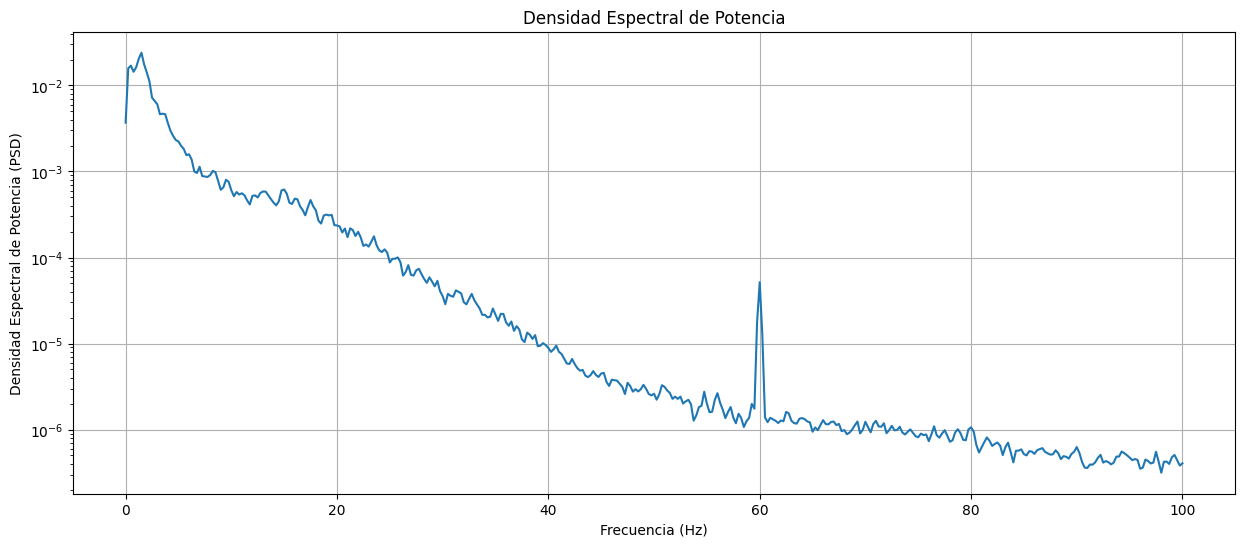

In [24]:
from scipy.signal import welch
from scipy.signal.windows import hann

fs = 500
window_size = 2000
overlap = window_size // 2
window = hann(window_size)

frequencies, power_spectrum = welch(canal1, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

max_freq = 100
indices = frequencies <= max_freq
frequencies_limited = frequencies[indices]
power_spectrum_limited = power_spectrum[indices]
plt.figure(figsize=(15, 6))
plt.semilogy(frequencies_limited, power_spectrum_limited)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (PSD)')
plt.title("Densidad Espectral de Potencia")
plt.grid(True)
plt.show()

Se puede observar un pico 60Hz, por lo cual hay presencia de ruido eléctrico.

<b>8)</b> Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

Como los picos más altos de frecuencias, se encuentra en frecuencias bajas, es decir que el rango de frecuencias de interés esta entre 0 y 60 Hz aproximadamente, entonces aplicamos un filtro pasabajas. Utilizamos una frecuencia de corte menor a 60 para poder que atenúe el ruido alrededor de esta frecuencia, considerando que la pendiente de atenuación no es la de un filtro ideal y cae completamente en 60 Hz.

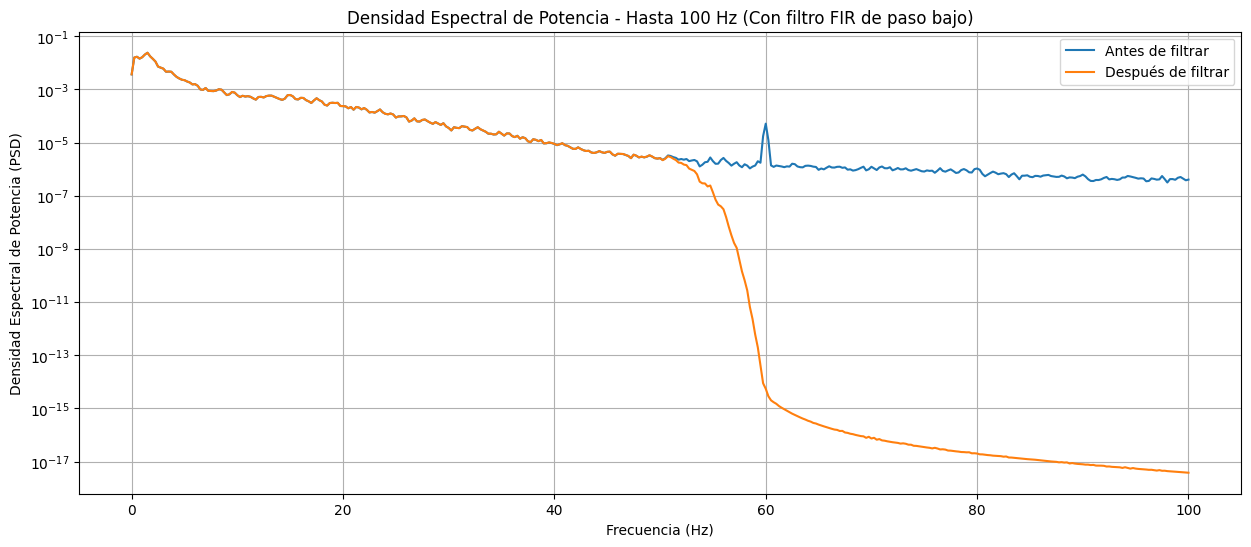

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, filtfilt, firwin

frequencies, power_spectrum = welch(canal1, fs=fs, nperseg=window_size, noverlap=overlap)

max_freq = 100
indices = frequencies <= max_freq
frequencies_limited = frequencies[indices]
power_spectrum_limited = power_spectrum[indices]

order = int(3.3 / (10 / fs))
nyquist = fs / 2
wn_low = 55 / nyquist
low_pass = firwin(order + 1, wn_low, window='hamming')

canal1_filt = filtfilt(low_pass, 1, canal1)

frequencies_filt, power_spectrum_filt = welch(canal1_filt, fs=fs, nperseg=window_size, noverlap=overlap)

power_spectrum_filt_limited = power_spectrum_filt[indices]

plt.figure(figsize=(15, 6))
plt.semilogy(frequencies_limited, power_spectrum_limited, label='Antes de filtrar')
plt.semilogy(frequencies_limited, power_spectrum_filt_limited, label='Después de filtrar')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (PSD)')
plt.title("Densidad Espectral de Potencia - Hasta 100 Hz (Con filtro FIR de paso bajo)")
plt.legend()
plt.grid(True)
plt.show()

<b>9)</b> Grafique un segmento de las señales antes y después de filtrar. Analice los cambios.

Se toman 1000 muestras, lo que equivale a un tiempo desde 1 segundo hasta 3 segundos. Se observa que la señal no presenta distoriones de línea después de aplicar el filtro FIR que atenua frecuencias a partir de los 60 Hz. Este filtro permite conservar los componentes de frecuencia significativos de la bioseñal, los cuales se encuentran entre los 0 y 40 Hz, aproximadamente según la gráfica de densidad espectral de potencia.

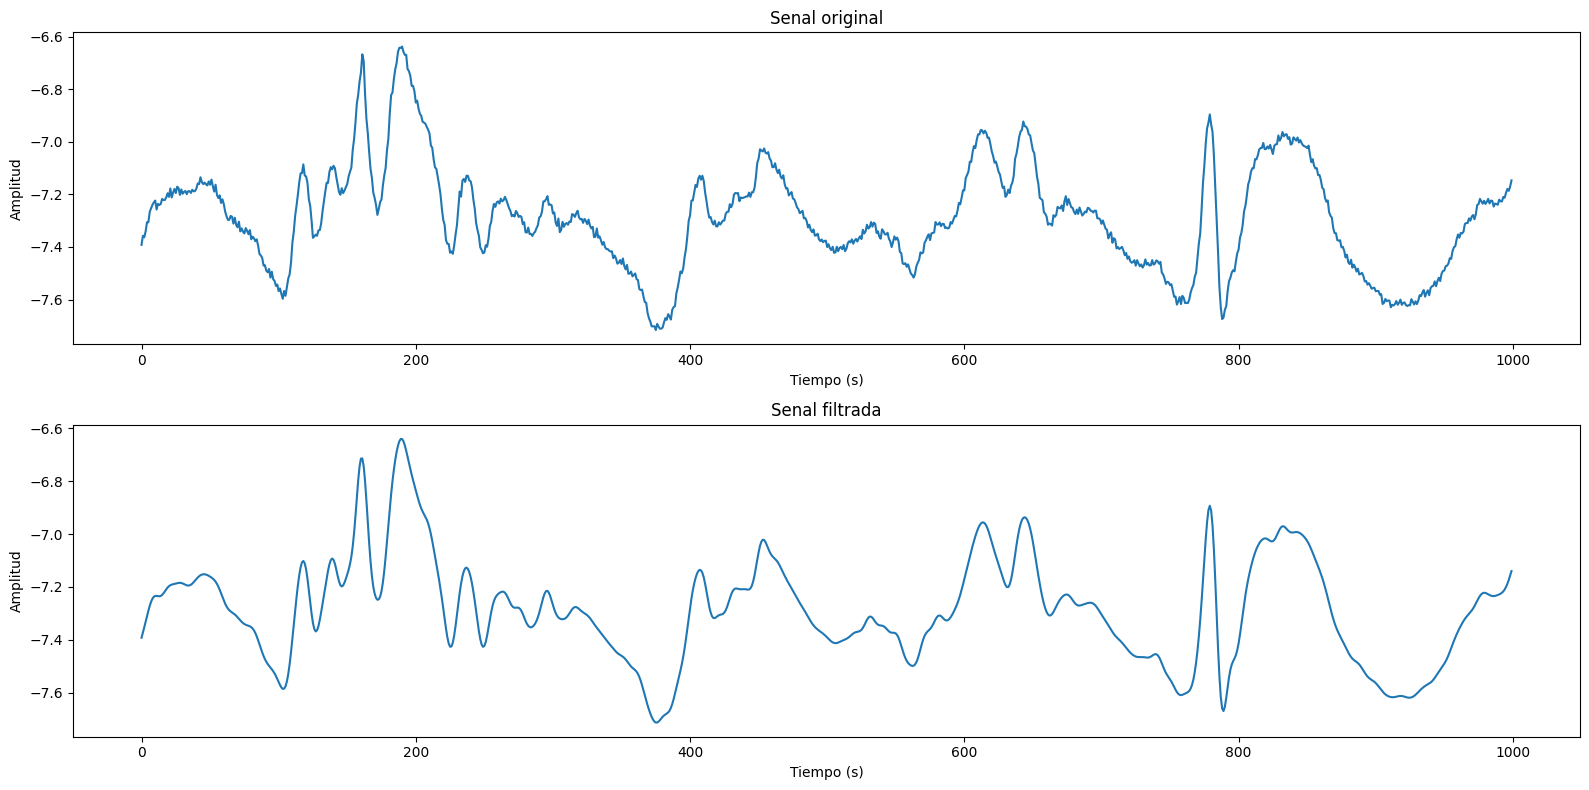

In [28]:
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
plt.plot(canal1[500:1500])
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Senal original')

plt.subplot(2,1,2)
plt.plot(canal1_filt[500:1500])
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Senal filtrada')

plt.tight_layout()
plt.show()

##<b>Conclusiones</b>

* En cuanto a los gráficos de magnitud (dB) y fase (rad) para la respuesta de los filtros en frecuencia, se presentan distorsiones en un rango más amplio de frecuencias para los filtros FIR, lo que puede deberse a que este tipo de filtros no presentan retroalimentación de la señal filtrada, a diferencia de los filtros IIR que tienen una pendiente de atenuación más lenta pero más lineal.

* Los filtros FIR presentan magnitudes de atenuación menores comparadas con las de los IIR, lo que representa un rendimiento menor si se considera que la banda de rechazo tiene mucha distorsión y rizado, provocando que las frecuencias que se deberían atenuar no se procesen adecuadamente. Los filtros IIR, apesar de presentar mucho rizado en la banda de rechazo, tiene un rango de frecuencias más corto donde se produce este fenómeno.

* Las diferentes funciones para aplicar filtros digitales a una señal, tales como ```lfilter``` y ```filfilt```, resultan en resultados similares. Solo se presentan diferencias menores en cuanto al retraso de la señal que no se evidenciaron con la señal de muestra. Para otro tipo de señales con mayor número de muestras y diferentes condiciones de frecuencia puede que estas funciones presenten resultados diferentes.